## Model Explainability for Deep Learning Text Classifiers
Dataset - Tweet Emotions 
(Multiclass Classification Problem)

In [4]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [6]:
data = pd.read_csv("NewData.csv")
data.head(5)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [7]:
data.shape

(20000, 2)

In [8]:
data["Emotion"].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64

In [9]:
# We can notice the imbalance in emotions. 
data.isnull().sum()

Text       0
Emotion    0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


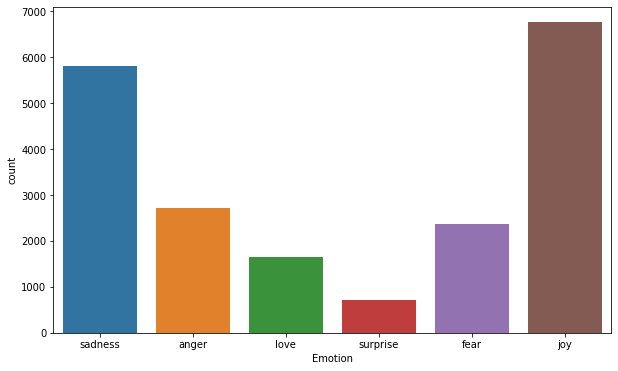

In [10]:
# No null values found in data
# There are no null values
plt.figure(figsize=(10,6))
sns.countplot(data["Emotion"])
plt.show()

In [11]:
# Label Encoding the sentiment column
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#data["Emotion"]= le.fit_transform(data["Emotion"])
#data.head(5)

In [12]:
data["Emotion"].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64

## Text Preprocessing:-

- Expanding Contractions
- Removing @mentions, hashtags and emojis 
- Removing Punctuations
- Removing digits
- Converting to lowercase
- Removing Stopwords

In [13]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 5.2 MB/s 
     |████████████████████████████████| 287 kB 39.9 MB/s 


In [14]:
pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import contractions
import preprocessor as p
import string
import regex as re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
STOPWORDS = set(stopwords.words('english'))

# Functions

In [17]:
def expand_contractions(text):
    text = contractions.fix(text)
    return text

def clean_tweet(text):
    text = p.clean(text)
    return text

punct_list=list(string.punctuation)
print(punct_list)
def remove_punctuation(text):
    
    for punc in punct_list:
        
        if punc in text:
            text = text.replace(punc,'')
    return text.strip()

def remove_digits(text):
    text = re.sub(r'\d+', '', text)
    return text

def to_lowercase(text):
    text = text.lower()
    return text

def remove_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text








['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [18]:
data["Text"] = data["Text"].apply(expand_contractions)

In [19]:
data.head(5)

,Text,Emotion
0,i did not feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,i am grabbing a minute to post i feel greedy w...,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [20]:
data["Text"] = data["Text"].apply(clean_tweet)
# Although the dataset appears to be free from hashtags,emojis, punctuations or numbers but this is a safe step to remove these if there are any


In [21]:
data["Text"] = data["Text"].apply(remove_punctuation)

In [22]:
data["Text"] = data["Text"].apply(remove_digits)

In [23]:
data["Text"] = data["Text"].apply(to_lowercase)

In [24]:
data["Text"] = data["Text"].apply(remove_stopwords)

In [25]:
data.head()

,Text,Emotion
0,feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger


# Preprocessing is Complete
fit_on_texts Updates internal vocabulary based on a list of texts. 
This method creates the vocabulary index based on word frequency. 
So if you give it something like, "The cat sat on the mat." 
It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"]
= 2 it is word -> index dictionary so every word gets a unique integer
value. 0 is reserved for padding. 
So lower integer means more frequent word (often the first few are stop words because they appear a lot).
texts_to_sequences Transforms each text in texts to a sequence of 
integers. So it basically takes each word in the text and replaces it 
with its corresponding integer value from the word_index dictionary. Nothing more, nothing less, certainly no magic involved.

In [26]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
# The maximum number of words to be used. (most frequent)
max_num_words = 50000
# Max number of words in each text statement.
max_seq_len = 250
embedding_dim = 100
tokenizer = Tokenizer(num_words=max_num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 16868 unique tokens.


In [28]:
X = tokenizer.texts_to_sequences(data['Text'].values)
X = pad_sequences(X, maxlen=max_seq_len)
print('Shape of features:', X.shape)

Shape of features: (20000, 250)


In [29]:
X

array([[   0,    0,    0, ...,    0,    1,  496],
       [   0,    0,    0, ...,   48, 1536, 1227],
       [   0,    0,    0, ...,    1,  372,  299],
       ...,
       [   0,    0,    0, ..., 2765,  292,   85],
       [   0,    0,    0, ...,  404,  577, 2011],
       [   0,    0,    0, ..., 1173,   15,   13]], dtype=int32)

In [30]:
Y = pd.get_dummies(data['Emotion']).values
print('Shape of class labels', Y.shape)

Shape of class labels (20000, 6)


In [31]:
Y

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

In [32]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense 

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(16000, 250) (16000, 6)
(4000, 250) (4000, 6)


In [34]:
X.shape[1]

250

In [35]:
lstm_model = Sequential()
lstm_model.add(Embedding(max_num_words, embedding_dim, input_length=X.shape[1]))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(6, activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
epochs = 6
batch_size = 64

history = lstm_model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)


Epoch 1/6
225/225 [==============================] - 196s 842ms/step - loss: 1.2915 - accuracy: 0.5094 - val_loss: 0.7364 - val_accuracy: 0.7594
Epoch 2/6
225/225 [==============================] - 183s 811ms/step - loss: 0.3610 - accuracy: 0.8835 - val_loss: 0.3334 - val_accuracy: 0.8831
Epoch 3/6
225/225 [==============================] - 188s 838ms/step - loss: 0.1586 - accuracy: 0.9497 - val_loss: 0.3155 - val_accuracy: 0.8938
Epoch 4/6
225/225 [==============================] - 178s 790ms/step - loss: 0.0849 - accuracy: 0.9737 - val_loss: 0.3254 - val_accuracy: 0.8963
Epoch 5/6
225/225 [==============================] - 176s 783ms/step - loss: 0.0599 - accuracy: 0.9819 - val_loss: 0.3243 - val_accuracy: 0.8988
Epoch 6/6
225/225 [==============================] - 174s 774ms/step - loss: 0.0427 - accuracy: 0.9869 - val_loss: 0.3274 - val_accuracy: 0.8975


In [37]:
acc = lstm_model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acc[0],acc[1]))

125/125 [==============================] - 11s 85ms/step - loss: 0.2926 - accuracy: 0.9075
Test set
  Loss: 0.293
  Accuracy: 0.908


In [46]:
Y_pred = lstm_model.predict(X_test)



125/125 [==============================] - 11s 91ms/step


In [44]:
Y_pred

array([[9.9982953e-01, 9.5441159e-05, 1.4102719e-06, 2.9750861e-06,
        2.9488992e-05, 4.1065956e-05],
       [6.2289566e-04, 1.9952706e-03, 9.9410337e-01, 2.6466541e-03,
        4.3223778e-04, 1.9962747e-04],
       [8.3900100e-01, 1.0301633e-01, 3.8968194e-03, 3.6284837e-03,
        3.8234733e-02, 1.2222687e-02],
       ...,
       [9.9899793e-01, 6.6514895e-04, 1.3343606e-05, 8.0915470e-06,
        2.0056847e-04, 1.1490546e-04],
       [3.7292284e-05, 7.9957950e-05, 9.9938017e-01, 1.3681078e-04,
        2.7864744e-04, 8.7204236e-05],
       [1.7351369e-06, 4.3772299e-05, 9.9936038e-01, 5.8388954e-04,
        5.8136302e-06, 4.3803639e-06]], dtype=float32)

In [40]:
y_pred_bool = np.argmax(Y_pred, axis=1) #Converting to single entry and not a list of probabilities)

In [43]:
y_pred_bool

array([0, 2, 0, ..., 0, 2, 2])

In [47]:
# But out test labels are still one hot encoded. Converting them to single value as this is 
# required to calculate classification report
Y_test_new = np.argmax(Y_test, axis = 1)

In [49]:
Y_test_new

array([0, 2, 4, ..., 0, 2, 2])

In [50]:
print(classification_report(Y_test_new, y_pred_bool))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       536
           1       0.87      0.85      0.86       458
           2       0.93      0.93      0.93      1339
           3       0.80      0.83      0.82       335
           4       0.94      0.94      0.94      1173
           5       0.78      0.78      0.78       159

    accuracy                           0.91      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.91      0.91      0.91      4000



In [56]:
from sklearn.metrics import accuracy_score,f1_score

acc = accuracy_score(Y_test_new,y_pred_bool)
f1=f1_score(Y_test_new,y_pred_bool, average='weighted')
print ("Accuracy is:", acc)
print("F1 Score is:",f1)

Accuracy is: 0.9075
F1 Score is: 0.9075769606950225


In [57]:
# save model and architecture to single file
lstm_model.save("lstm_model.h5")
print("Saved model to disk")
#model = load_model('model.h5')

Saved model to disk


In [61]:
from google.colab import files
files.download("lstm_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>